In [33]:
%matplotlib inline
import pandas as pd
import numpy as np

#data preparation
#importing data file 
dataframe = pd.read_csv("3droad.csv")
subset = dataframe[:30000]
dataframe.isnull().sum()

Column1    0
Column2    0
Column3    0
Column4    0
dtype: int64

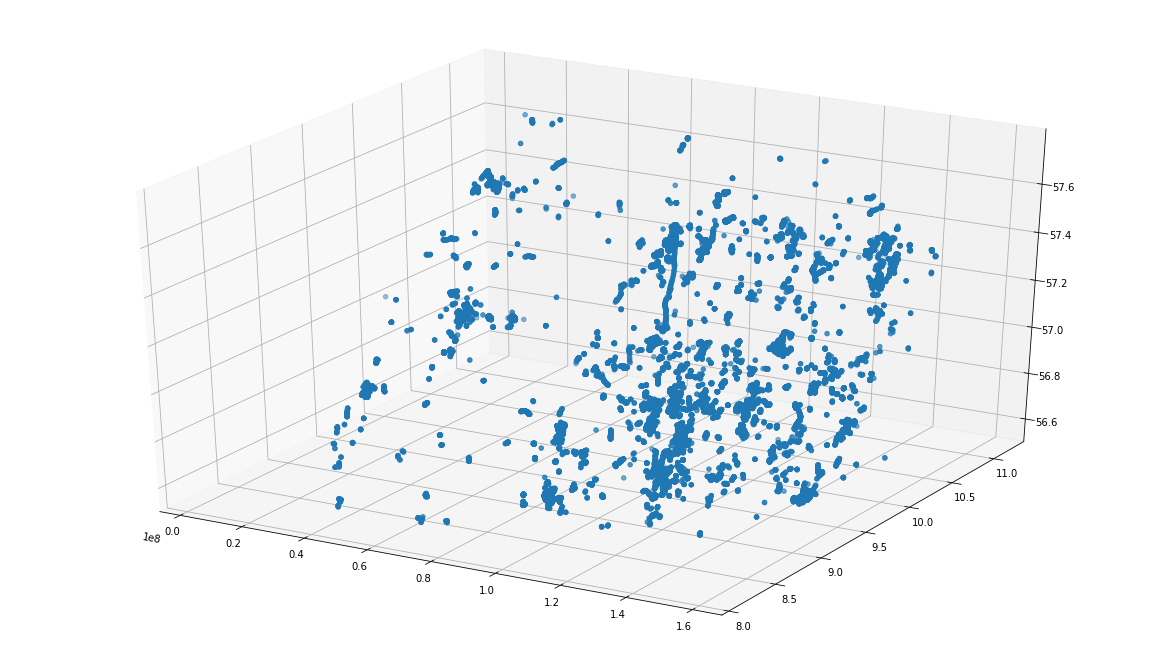

In [34]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

data = pd.DataFrame(df, columns = ['a1','a2','a3','a4'])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax= Axes3D(fig)
ax.scatter( data.iloc[:, 0].values,  data.iloc[:, 1].values,data.iloc[:, 2].values,data.iloc[:, 3].values)


[3 3 3 ... 2 2 2]


C:\Users\shama\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\shama\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:735: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


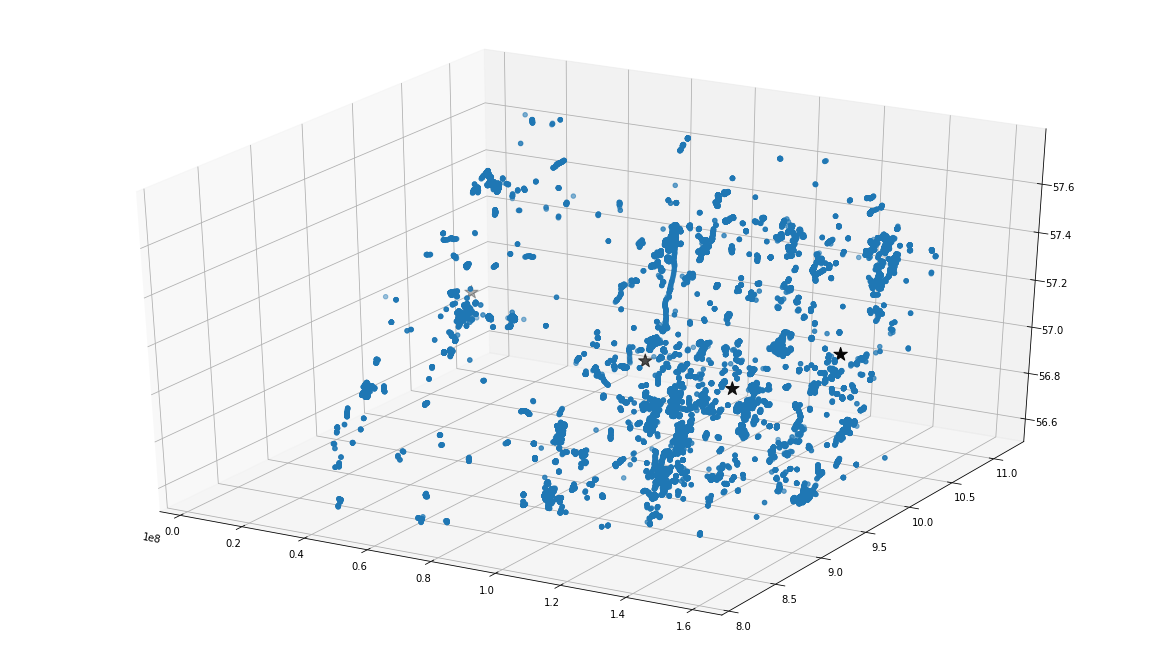

In [35]:
from sklearn.cluster import KMeans

f1 = data['a1'].values
f2 = data['a2'].values
f3 = data['a3'].values
f4 = data['a4'].values

x= np.array(list(zip(f1,f2,f3,f4)))

model = KMeans(n_clusters=4)
model = model.fit(x)

labels = model.predict(x)
C = model.cluster_centers_

print(model.labels_)

fig = plt.figure()

ax = Axes3D(fig)

ax.scatter( x[:, 0],  x[:, 1],x[:, 2],x[:, 3])

ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='*', c='#050505', s=200)
 

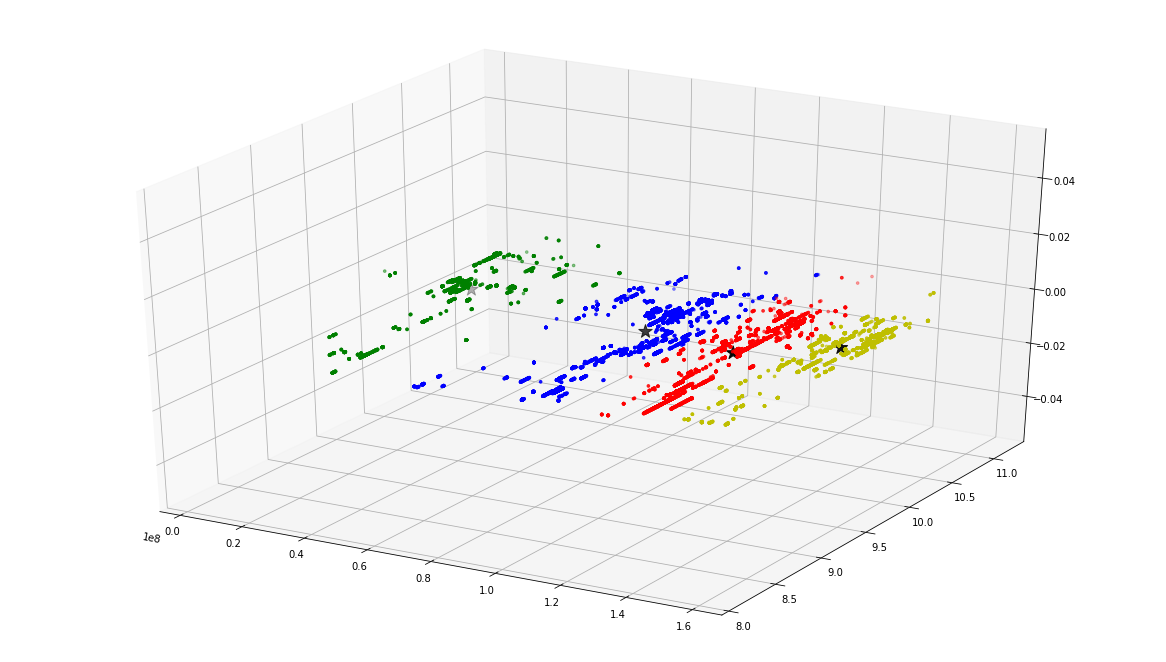

In [36]:
from copy import deepcopy
k=4
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(x))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(x)):
        distances = dist(x[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()

ax = Axes3D(fig)
for i in range(k):
        points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')